#  To Find Shortest Path (TSP)

## Problem Statement

To calculate shortest path that will cover all the 256 cities of USA so that 2020 US Presidential Candidate can visit all these cities for his/her campaign starting from San Fransisco and this tour ends in the same city. Each city should visit only once and starting & ending city should be same.We have to calculate shortest distance possible for this campaign. </br>
This problem refers to 'Traveling Salesman Problem'.

## Input File

There is input file named 'cities_all.csv' given which consist of 256 records for City, State, Latitude, Longitude.




## TSP Algorithm, connecting random dots 

In [ ]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])


# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

## Import records of cities along with its Latitude and Longitude

In [40]:
import pandas as pd
cities2= pd.read_csv("cities_all.csv")
cities2.head(6)

,City,State,Latitude,Longitude
0,San Francisco,California,37.774929,-122.419415
1,Aliso Viejo,California,33.567684,-117.725608
2,Rapid City,South Dakota,44.080543,-103.231015
3,Coon Rapids,Minnesota,45.173239,-93.303006
4,Malden,Massachusetts,42.425096,-71.066163
5,Noblesville,Indiana,40.045592,-86.008595


## Converting Longitude and Latitude into Cartesian X and Y

** R of earth =6371 KM**

x = R * cos( radiance(lat) ) * cos(radiance (lon))

y = R * cos( radiance(lat) ) * sin(radiance (lon))

In [41]:
from math import radians,cos,sin
lat =cities2["Latitude"].map(radians)
lon = cities2["Longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

cities2["lat_radians"] = lat
cities2["lon_radians"] = lon
cities2["x"] = x
cities2["y"] = y
cities2.head()



,City,State,Latitude,Longitude,lat_radians,lon_radians,x,y
0,San Francisco,California,37.774929,-122.419415,0.659297,-2.136622,-2699.749565,-2092.248985
1,Aliso Viejo,California,33.567684,-117.725608,0.585867,-2.054699,-2469.727915,-1638.876195
2,Rapid City,South Dakota,44.080543,-103.231015,0.769351,-1.801721,-1047.502487,-1014.410997
3,Coon Rapids,Minnesota,45.173239,-93.303006,0.788422,-1.628445,-258.774626,-260.344237
4,Malden,Massachusetts,42.425096,-71.066163,0.740458,-1.240339,1525.951607,1394.611476


In [42]:
cities = cities2.drop(["City", "State","Latitude", "Longitude", "lat_radians", "lon_radians"], 1)
cities.head(6)

,x,y
0,-2699.749565,-2092.248985
1,-2469.727915,-1638.876195
2,-1047.502487,-1014.410997
3,-258.774626,-260.344237
4,1525.951607,1394.611476
5,339.486999,285.324063


In [43]:
df = cities.copy()

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])


In [45]:
cities = np.asarray(cities)

In [46]:
scaled = np.asarray(scaled_df)

## Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)

In [47]:
route = two_opt(scaled,0.001)
route

array([  0, 194,  29, 122,  54,  41, 112, 157,  16, 227, 146,  73,  37,
        89, 255,  52, 243,  22, 203,  93, 160, 232, 110, 192, 123, 141,
        10, 113, 244, 234, 201,   1, 250,  82, 108, 116, 241,  55, 180,
       154, 106,  12,  74, 147,  97, 215, 211,  91, 210,  46, 236, 235,
       171, 169, 126,  34,  72,  68, 161,  60, 248, 198,  30,  76, 247,
        51,  79,  19, 140,  69, 151, 219, 230,  78,  67, 218, 245,  63,
       224, 184, 214,   8, 221,  11,  17,  21, 124, 134, 220, 233,  99,
        56,  49,   5, 168,  90,  35, 162, 143,  75, 239, 229, 186, 137,
        88, 152, 118, 172,   9, 195, 246,  13, 173, 178, 188, 204, 131,
       240,  44,  25, 136, 190,  39, 183, 144, 212, 251, 187, 155,   4,
        80, 174,  71,  28,  23, 164,  61, 191,  94, 253,  85, 179, 133,
       105, 149,  66, 252, 226, 158, 156, 119, 193, 167, 249,  70, 231,
        36, 196, 222,  20, 165, 129, 114, 209,   7,   6, 142, 181,  65,
        32,  87, 216, 189, 206,  33, 125, 228, 121, 205, 153, 23

## PLOT IN CARTESIAN 

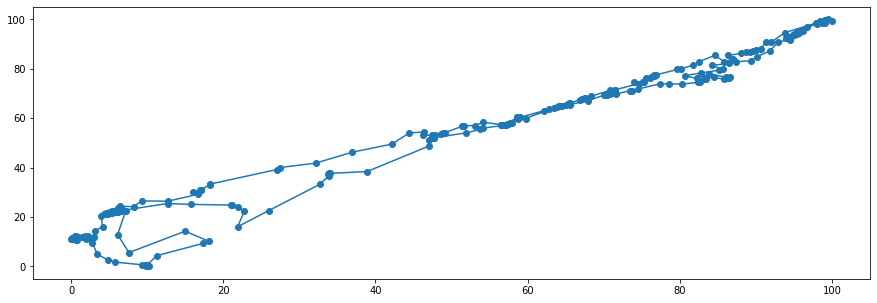

Route: [  0 194  29 122  54  41 112 157  16 227 146  73  37  89 255  52 243  22
 203  93 160 232 110 192 123 141  10 113 244 234 201   1 250  82 108 116
 241  55 180 154 106  12  74 147  97 215 211  91 210  46 236 235 171 169
 126  34  72  68 161  60 248 198  30  76 247  51  79  19 140  69 151 219
 230  78  67 218 245  63 224 184 214   8 221  11  17  21 124 134 220 233
  99  56  49   5 168  90  35 162 143  75 239 229 186 137  88 152 118 172
   9 195 246  13 173 178 188 204 131 240  44  25 136 190  39 183 144 212
 251 187 155   4  80 174  71  28  23 164  61 191  94 253  85 179 133 105
 149  66 252 226 158 156 119 193 167 249  70 231  36 196 222  20 165 129
 114 209   7   6 142 181  65  32  87 216 189 206  33 125 228 121 205 153
 237 207 208 166  53 128  26  42  59  38 130 185 115 175 120 102 109  98
  24 217  92   3 132  40 159  95 148  15  77 150  58 111  50 176   2  57
 177  47  64  14  62  45 127 139 138 182 163  27 197  48 104 202 238 199
 200 213 223  31  96 101 242 135 145 254 100

In [48]:
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([scaled[route[i]] for i in range(len(route))]),np.array([scaled[0]])))
# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance_scaled: " + str(path_distance(route,scaled)))

In [49]:
# unit of scale = ()Max (Lng or Lat) - Min(Lng or Lat)) /100
# unit of scale = 53.31km
Distance_km = path_distance(route,scaled) * 53.31
Distance_km

20858.546309601243

#### Hence, Distance is 20858.546309601243

In [50]:
order = pd.DataFrame(route, columns=["index"])
cities2["index"] = cities2.index
cities2
travel=order.merge(cities2, on = "index")

In [70]:
start= travel[0:1]
loop = travel.append(start)
loop

,index,City,State,Latitude,Longitude,lat_radians,lon_radians,x,y
0,0,San Francisco,California,37.774929,-122.419415,0.659297,-2.136622,-2699.749565,-2092.248985
1,194,South San Francisco,California,37.654656,-122.407750,0.657198,-2.136418,-2703.268622,-2085.908172
2,29,San Mateo,California,37.562992,-122.325525,0.655598,-2.134983,-2700.480800,-2076.872811
3,122,Campbell,California,37.287165,-121.949957,0.650784,-2.128428,-2682.313180,-2042.425651
4,54,San Jose,California,37.338208,-121.886329,0.651675,-2.127318,-2675.717868,-2041.172044
...,...,...,...,...,...,...,...,...,...
252,84,San Ramon,California,37.779927,-121.978015,0.659384,-2.128918,-2666.740720,-2067.040173
253,81,San Leandro,California,37.724930,-122.156077,0.658424,-2.132026,-2681.994832,-2074.745822
254,117,Vallejo,California,38.104086,-122.256637,0.665042,-2.133781,-2675.651485,-2098.286925
255,18,Napa,California,38.297538,-122.286865,0.668418,-2.134308,-2670.782072,-2109.070256


## Writting best route to CSV file

In [72]:
loop['City'].to_csv('output.csv',index = False )

## PLOT IN LONGITUDE AND LATITUDE

<AxesSubplot:xlabel='Longitude'>

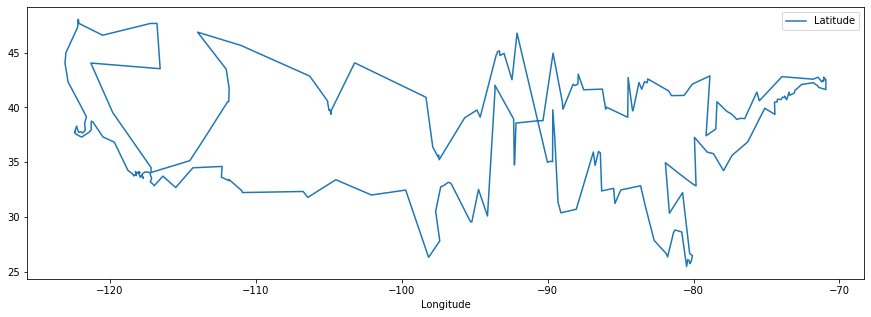

In [53]:
loop.plot(kind="line", x="Longitude", y="Latitude")